# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [9]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

# 1. Is the distribution normal about body temp

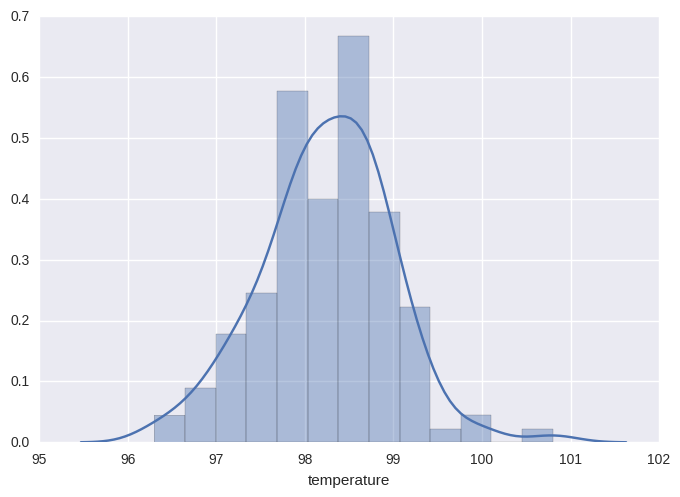

In [8]:
sns.distplot(df.temperature)
plt.show()

The histogram shows temperatures that are roughly normal around the mean.

# 2. Is the sample size large and are obs independent?

The sample size is only 130 observations, but the general rule of thumb for the Central Limit Theorem is > 30, so we should be ok. The observations are independent since one person's body temperature does not depend on another person's body temperature, though I suppose an exogenous factor could influence BOTH body temperatures (like if you took temps of people in a sauna)

# 3. Is the true pop mean 98.6 degrees?
While we can never acutally now the true population mean, we can get pretty confident about where the true population mean lies.

To test this we would set a null hypothosis that the mean = 98.6 degrees and then do a two sided test, since we do not care in which direction the mean differs from 98.6 degrees, only that it does differ.

Below is code to calculate the Z statistic, which is appropriate given the size of the sample.

In [15]:
mu = df.temperature.mean()
std = df.temperature.std()
print('mu is {mu:.2f} and std is {std:.2f}'.format(mu=mu, std=std))

mu is 98.25 and std is 0.73


In [32]:
def z_statistic(assume_mu, observed_mu, std_estimator):
    return (observed_mu - assume_mu) / std_estimator

std_estimator = std / math.sqrt(len(df))

z = z_statistic(98.6, mu, std_estimator)
print('z statistic is {}'.format(z))

z statistic is -5.4548232923645195


Because the z statistic is so high vs. the critical value of 1.96 for a significance level of 95%
, we can actually reject the null hypothesis that the mean is 98.6 degrees fahrenheit, at least given this sample.

Now let's try using a t test.... well a T test will be actually the same exact statistic since the test statistic is calculated in the same way. Checking a t table, of course 5.45 is much higher than any T critical value, which again means we can reject the null hypothesis.

# 4. What is an abnormal temperature?
To find this calculate margin of error and confidence interval. For the purposes of this data let's use a 95% significance level again.

In [40]:
confidence_interval = 1.96 * std_estimator
print('We are confident that there is a 95% chance the mean is between:\n {:.2f} and {:.2f}'.format(mu-confidence_interval, mu+confidence_interval))

We are confident that there is a 95% chance the mean is between:
 98.12 and 98.38


In [42]:
print('Alternatively, we could report a {:.2f} degree margin of error'.format(confidence_interval))

Alternatively, we could report a 0.13 degree margin of error


# 5. Does temperature differ significantly with gender?

In [49]:
g = df.groupby('gender').temperature.agg(['mean', 'std', 'count'])
g

,mean,std,count
gender,,,
F,98.393846,0.743488,65
M,98.104615,0.698756,65


In [55]:
# Null hypothesis: no difference, aka F.mean = M.mean
# Alternative: F.mean != M.mean

mu = g.loc['F', 'mean']
null_mu = g.loc['M', 'mean']

std_est = g.loc['F', 'std'] / math.sqrt(g.loc['F', 'count'])

print('mu: {}\nnull_mu: {}\nstd_est: {}'.format(mu, null_mu, std_est))

mu: 98.39384615384613
null_mu: 98.1046153846154
std_est: 0.09221830608036222


In [57]:
z_g = z_statistic(assume_mu=null_mu, observed_mu=mu, std_estimator=std_est)
z_g

3.1363704401453796

With a z score of 3.14, this result is significant at a 95% significance level (and even at 99%!) so we can reject the null hypothesis and be reasonably confident there is a true difference in the two means.

Used the normal z score here rather than t-test because for both populations we have n > 30.

# Conclusion

In conclusion, given the sample, I am skeptical of the long standing belief that the true mean body temperature is 98.6 percent. With this sample, it seems much more likely that the true mean is around 98.2 degrees Fahrenheit.

Furthermore, gender seems to play a role in body temperature. In our sample, females body temps were about 0.3 degrees higher on average and the difference in the means was significant. 